## Actividad 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

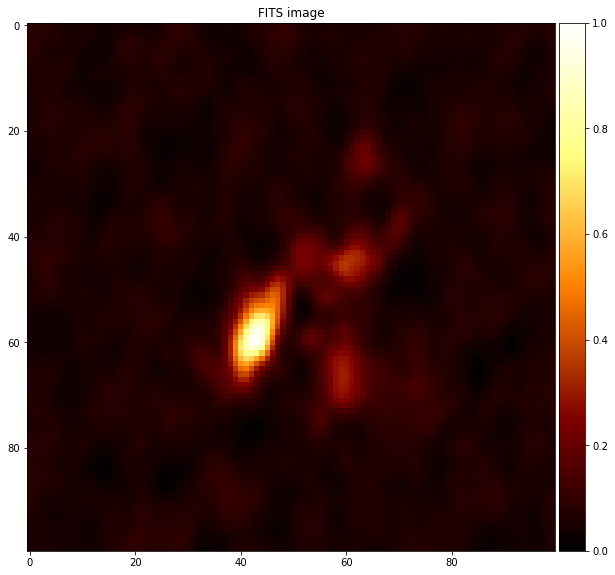

In [2]:
# first we load the data:
data = np.load("orion.npy")
data_original = np.copy(data)
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

In [3]:
def RMS(data):
    return (np.dot(data.ravel(), data.ravel())/data.size)**0.5   

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

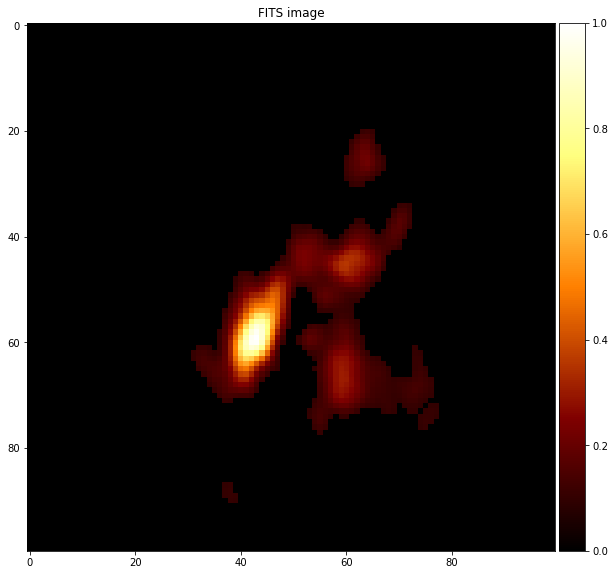

In [4]:
mask = data >= RMS(data)
data2 = data*mask
image_plot(data2)

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_ (sin generar copias de el mismo).

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [5]:
# Gaussian blur filter: Ocupar este filtro!
kernel_filter = np.array([[1,2,1], [2,4,2], [1,2,1]]) * 1./16. 

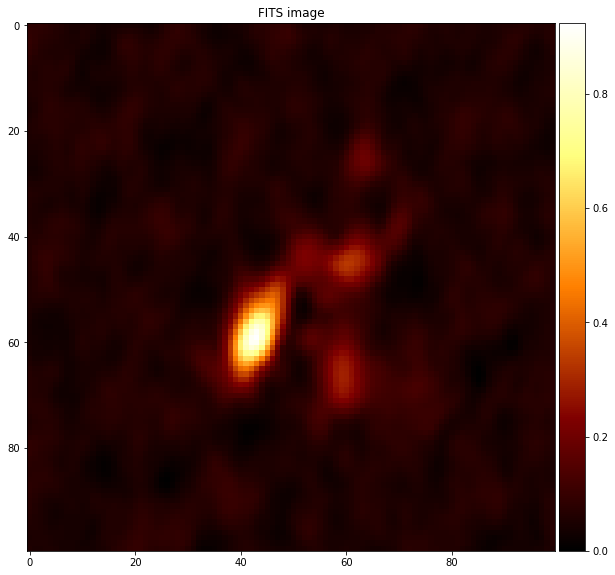

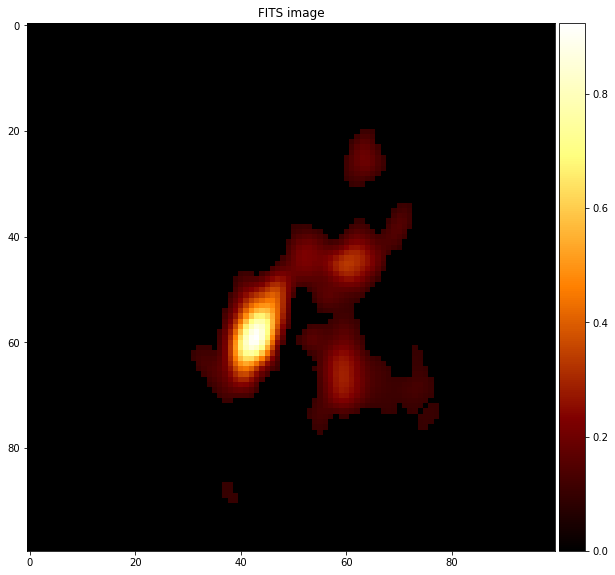

In [7]:
def apply_filter(data, mask, kernel_filter):
    indices = np.where(mask)
    convolucion = np.zeros(mask.shape)
    for i in range(indices[0].size):       
        fila, columna = indices[0][i], indices[1][i]
        convolucion[fila,columna] = np.dot(data[fila-1:fila+2, columna-1:columna+2].ravel(),
                                            kernel_filter.ravel()[::-1])        
    data *= ~mask
    data += convolucion   
apply_filter(data, data > RMS(data), kernel_filter)
image_plot(data)
image_plot(data*mask)